In [1]:
# Imports,
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Functions,
def MinMaxNorm(array):
    MIN, MAX = np.min(array.flatten()), np.max(array.flatten())
    return (array - MIN)/(MAX - MIN)

In [2]:
# Loading data,
input_grids = np.load("Dark Matter Mass Density-SIMBA_CV_z=0-PROCESSED-TEST.npy")
target_grids = np.load("Electron Number Density-SIMBA_CV_z=0-PROCESSED-TEST.npy")

# Defining the split,
TRAIN_PROP = 0.7
VALIDATION_PROP = 0.15
TEST_PROP = 0.15
RANDOM_STATE = 42

data_length = input_grids.shape[0]
data_indices = np.arange(start = 0, stop = data_length, step = 1)

# Shuffling the indices,
np.random.shuffle(data_indices)

# Split indices into train and temp (val+test),
train_indices, temp_indices = train_test_split(data_indices, test_size = (VALIDATION_PROP + TEST_PROP), random_state = RANDOM_STATE)

# Further split temp into validation and test,
val_indices, test_indices = train_test_split(temp_indices, test_size = (TEST_PROP/(VALIDATION_PROP + TEST_PROP)), random_state = RANDOM_STATE)

# Creating training, testing and validation data,
X_train, Y_train = input_grids[train_indices], target_grids[train_indices]
X_test, Y_test = input_grids[test_indices], target_grids[test_indices]
X_val, Y_val = input_grids[val_indices], target_grids[val_indices]

# Modifying the dynamic range of the data,
X_train = np.log10(X_train)
Y_train = np.log10(Y_train)
X_test = np.log10(X_test)
Y_test = np.log10(Y_test)

# Applying Min-Max Normalisation,
X_train, Y_train = MinMaxNorm(X_train), MinMaxNorm(Y_train)
X_test, Y_test = MinMaxNorm(X_test), MinMaxNorm(Y_test)
X_val, Y_val = MinMaxNorm(X_val), MinMaxNorm(Y_val)

In [3]:
# Reshaping arrays to correct format (batch, channel, z, y, x),
X_train, Y_train = np.expand_dims(X_train, axis = 1), np.expand_dims(Y_train, axis = 1)
X_test, Y_test = np.expand_dims(X_test, axis = 1), np.expand_dims(Y_test, axis = 1)
X_val, Y_val = np.expand_dims(X_val, axis = 1), np.expand_dims(Y_val, axis = 1)

# Coverting Numpy arrays into torch tensors,
X_train, Y_train = torch.tensor(X_train, dtype = torch.float32), torch.tensor(Y_train, dtype = torch.float32)
X_test, Y_test = torch.tensor(X_test, dtype = torch.float32), torch.tensor(Y_test, dtype = torch.float32)
X_val, Y_val = torch.tensor(X_val, dtype = torch.float32), torch.tensor(Y_val, dtype = torch.float32)

# Creating tuples,
train_tuple, test_tuple, val_tuple = (X_train, Y_train), (X_test, Y_test), (X_val, Y_val)

# Saving datasets as pt files,
torch.save(train_tuple, "train.pt")
torch.save(test_tuple, "test.pt")
torch.save(val_tuple, "validation.pt")

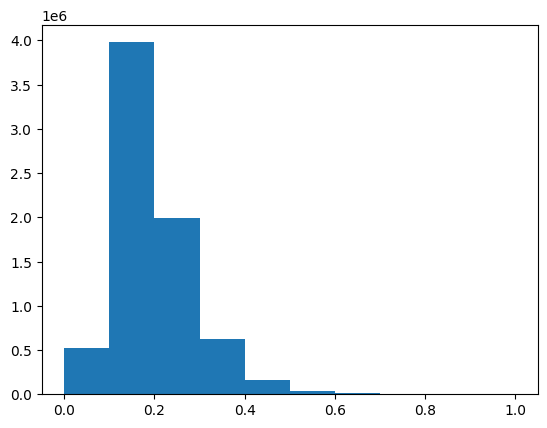

In [4]:
plt.hist(X_train.flatten())
plt.show()

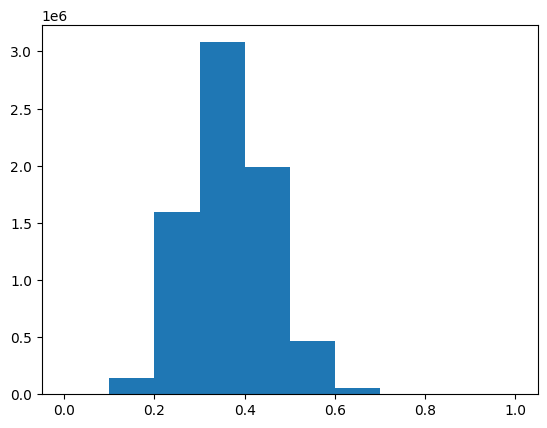

In [5]:
plt.hist(Y_train.flatten())
plt.show()